# Bitcoin Price Forecasting

Welcome to my Kaggle notebook, "Bitcoin Price Forecasting," where I delve into the intriguing realm of cryptocurrency analysis and prediction using the LSTM (Long Short-Term Memory) algorithm. In this notebook, we embark on a journey to uncover valuable insights and trends within Bitcoin price data. Through meticulous exploration and analysis, we aim to gain a deeper understanding of the factors influencing Bitcoin's price movements. Leveraging the power of LSTM. Join me as we navigate through the dynamic landscape of Bitcoin price forecasting, uncovering hidden patterns and paving the way for informed decision-making in the volatile world of cryptocurrency.

## Column Sammary

* **Date:** The timestamp indicating the date and time of each recorded data point.
* **Open:** The opening price of Bitcoin at the beginning of the time interval.
* **High:** The highest price of Bitcoin reached during the time interval.
* **Low:** The lowest price of Bitcoin reached during the time interval.
* **Close:** The closing price of Bitcoin at the end of the time interval.
* **Volume:** The trading volume of Bitcoin during the time interval.


This dataset provides a comprehensive view of Bitcoin price movements over time, including key metrics such as opening, highest, lowest, and closing prices, along with trading volume. These attributes are essential for analyzing the dynamics of Bitcoin markets and for developing predictive models to forecast future price movements.



### Unveiling Insights: **Bitcoin Price Forecasting**

Inquisitive Questions:

**First, let's dive into univariate analysis for the 'Open', 'Close', and 'Volume' columns by asking these five questions:**

1. What is the average value for each column?
2. What is the highest value in each column?
3. What is the lowest value in each column?
4. How are the values distributed for each column?
5. Are there any outliers present in each column?

**Following the univariate analysis, we'll explore bivariate relationships with the following questions:**

1. Is there a correlation between the opening and closing prices?
2. How does the volume of trading vary with changes in the opening price?
3. Does the opening price tend to be higher or lower on days with higher trading volume?
4. Is there a relationship between the opening price and the highest price?
5. How does the closing price change relative to the opening price on different days?
6. Is there a correlation between the opening price and the highest price?

Through these analyses, we aim to gain a comprehensive understanding of Bitcoin price dynamics and uncover valuable insights to inform our forecasting models.

# Importing Needed Libraries

In [1]:
# Import necessary libraries
import math                 # For mathematical operations
import numpy as np          # For numerical operations
import pandas as pd         # For data manipulation and analysis
import seaborn as sns       # For data visualization
sns.set_style('whitegrid')  # Set seaborn style to whitegrid
import matplotlib.pyplot as plt  # For plotting graphs
plt.style.use("fivethirtyeight")  # Use 'fivethirtyeight' style for matplotlib plots

# Importing Keras libraries for building neural network models
import keras
from keras.models import Sequential  # For sequential model building
from keras.callbacks import EarlyStopping  # For early stopping during model training
from keras.layers import Dense, LSTM, Dropout  # For adding layers to neural network model

# Importing Scikit-learn libraries for data preprocessing and model evaluation
from sklearn.preprocessing import MinMaxScaler  # For data normalization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For model evaluation

import warnings   # For handling warnings
warnings.simplefilter('ignore')   # Ignore warnings for cleaner output

## Reading The Data

In [2]:
# Read a CSV file into a DataFrame
data_dir = r"D:\Jupyter files\Kaggle Projects\The Datasets\BTC-1min.csv"
df = pd.read_csv(data_dir)

# Data Exploration

In [3]:
# Display the first few rows of the DataFrame
df.head()

,Date,Open,High,Low,Close,Volume
0,"02/09/2019, 12:00:00",9748.00,9750.68,9748.00,9748.60,7.325838
1,"02/09/2019, 12:01:00",9749.08,9750.00,9748.00,9748.58,6.897352
2,"02/09/2019, 12:02:00",9748.61,9750.60,9748.01,9749.92,7.390435
3,"02/09/2019, 12:03:00",9749.35,9753.22,9749.31,9753.22,10.048963
4,"02/09/2019, 12:04:00",9752.50,9754.33,9748.00,9748.79,25.327087


In [4]:
# Display the last few rows of the DataFrame
df.tail()

,Date,Open,High,Low,Close,Volume
1324116,"13/03/2022, 11:56:00",39062.00,39062.00,39055.00,39055.01,4.22558
1324117,"13/03/2022, 11:57:00",39055.00,39080.00,39055.00,39072.67,13.21958
1324118,"13/03/2022, 11:58:00",39072.67,39073.00,39062.00,39071.12,6.76193
1324119,"13/03/2022, 11:59:00",39071.13,39071.13,39061.59,39066.86,11.56474
1324120,"13/03/2022, 12:00:00",39066.85,39080.25,39054.93,39078.84,30.17376


In [5]:
# Get the dimensions of the DataFrame
df.shape

(1324121, 6)

In [6]:
# Get the column names of the DataFrame
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [7]:
# Display concise summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324121 entries, 0 to 1324120
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Date    1324121 non-null  object 
 1   Open    1324121 non-null  float64
 2   High    1324121 non-null  float64
 3   Low     1324121 non-null  float64
 4   Close   1324121 non-null  float64
 5   Volume  1324121 non-null  float64
dtypes: float64(5), object(1)
memory usage: 60.6+ MB


In [8]:
# Generate descriptive statistics of the DataFrame
# Transpose the result for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1324121.0,27367.352038,19241.116526,3810.00,9293.51000,19019.780000,45168.560000,69000.000000
High,1324121.0,27386.229780,19254.913615,3900.00,9297.15000,19030.000000,45200.000000,69000.000000
Low,1324121.0,27348.406511,19227.325097,3782.13,9290.00000,19009.760000,45132.120000,68786.700000
Close,1324121.0,27367.369813,19241.110100,3810.78,9293.53000,19019.830000,45168.690000,69000.000000
Volume,1324121.0,45.076345,67.794616,0.00,15.33559,27.102836,49.391479,3564.139435


In [9]:
# Check for missing values in each column of the DataFrame
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
# Displaying the data types of columns in the DataFrame
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

# Data Preprocessing

In [3]:
# Convert the 'Date' column to the desired format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y, %H:%M:%S')

# Display the first few rows to verify the conversion
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-09-02 12:00:00,9748.00,9750.68,9748.00,9748.60,7.325838
1,2019-09-02 12:01:00,9749.08,9750.00,9748.00,9748.58,6.897352
2,2019-09-02 12:02:00,9748.61,9750.60,9748.01,9749.92,7.390435
3,2019-09-02 12:03:00,9749.35,9753.22,9749.31,9753.22,10.048963
4,2019-09-02 12:04:00,9752.50,9754.33,9748.00,9748.79,25.327087


### Create a dataframe with day date 

In [4]:
# Extracting date part from the 'Date' column and assigning it back to the 'Date' column
df['Date'] = pd.to_datetime(df['Date']).dt.date

# Grouping the DataFrame by date and calculating the mean of 'Open', 'Close', 'High', 'Low', and 'Volume' columns
df_day = df.groupby('Date')[['Open', 'Close', 'High', 'Low', 'Volume']].mean()

# Converting the grouped DataFrame to a new DataFrame
df_day = pd.DataFrame(df_day)

# Displaying the first few rows of the new DataFrame
df_day.head()

,Open,Close,High,Low,Volume
Date,,,,,
2019-09-02,9938.539917,9939.415181,9944.375653,9933.391639,40.426370
2019-09-03,10467.594153,10467.835035,10473.393549,10462.059229,33.761307
2019-09-04,10554.543493,10554.518701,10560.530889,10548.186590,31.525191
2019-09-05,10552.762521,10552.666771,10557.909646,10547.511611,25.046203
2019-09-06,10658.355833,10658.238181,10664.322757,10651.985181,39.690749


In [13]:
df_day.shape

(924, 5)

## Univariate Analysis & Visualizations

### 1) Open column

In [14]:
# a. Check for average opening price
print("a. Average opening price:", df_day['Open'].mean())

# b. Check for highest opening price
print("b. Highest opening price:", df_day['Open'].max())

# c. Check for lowest opening price
print("c. Lowest opening price:", df_day['Open'].min())

# d. Check for outliers in the opening price
# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = df_day['Open'].quantile(0.25)
Q3 = df_day['Open'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers using the lower and upper bounds
outliers = df_day[(df_day['Open'] < lower_bound) | (df_day['Open'] > upper_bound)]['Open']

print("d. Outliers in opening price:")
# Check if any outliers are found
if len(outliers) == 0:
    print("   No outliers found.")
else:
    # Print the count of outliers
    print(outliers.count())

a. Average opening price: 27369.50717188758
b. Highest opening price: 67409.38964583333
c. Lowest opening price: 5052.649819444445
d. Outliers in opening price:
   No outliers found.


e. Histogram of opening price over time:


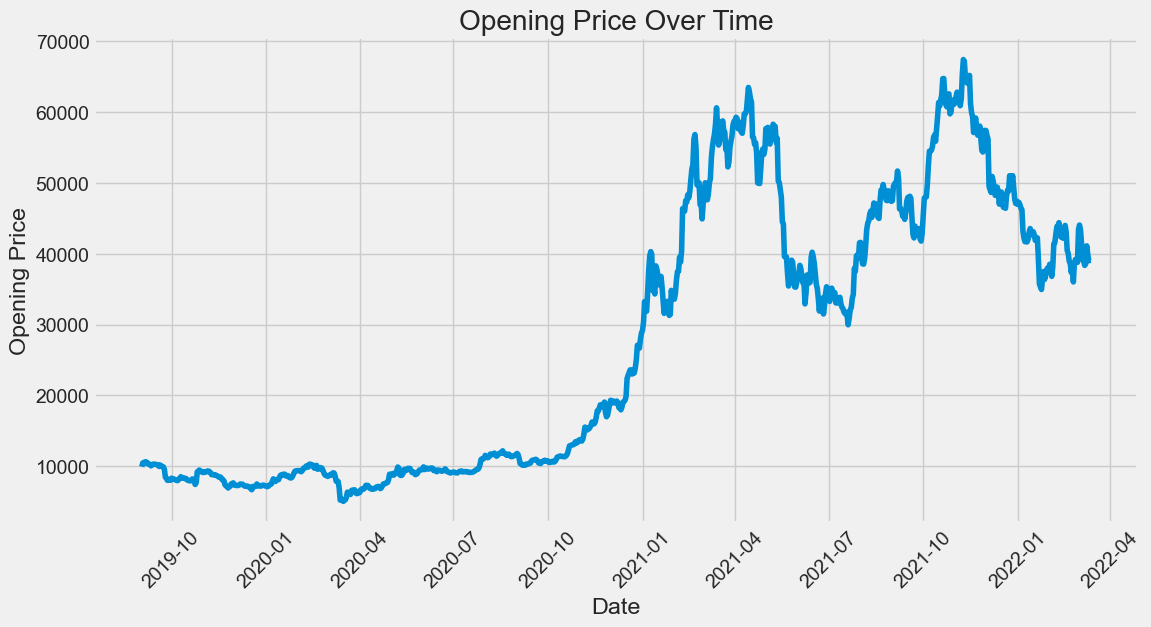

In [8]:
# e. Histogram of opening price over time
print("e. Histogram of opening price over time:")
# Create a line plot of opening price over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Open', data=df_day)
# Add title and labels to the plot
plt.title('Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

* Average opening price: 27369.5
* Highest opening price: 67409.38
* Lowest opening price: 5052.64
* There is no outliers in Open column
* From beginning of 2021 opening price has jumped to over 4000$ and continue upraise

### 2) Close Column

In [16]:
# a. Check for average closing price
print("a. Average closing price:", df_day['Close'].mean())

# b. Check for highest closing price
print("b. Highest closing price:", df_day['Close'].max())

# c. Check for lowest closing price
print("c. Lowest closing price:", df_day['Close'].min())

# d. Check for outliers in the closing price
# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = df_day['Close'].quantile(0.25)
Q3 = df_day['Close'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers using the lower and upper bounds
outliers = df_day[(df_day['Close'] < lower_bound) | (df_day['Close'] > upper_bound)]['Close']

print("d. Outliers in closing price:")
# Check if any outliers are found
if len(outliers) == 0:
    print("   No outliers found.")
else:
    # Print the count of outliers
    print(outliers.count())

a. Average closing price: 27369.522874210674
b. Highest closing price: 67410.2569375
c. Lowest closing price: 5052.576895833334
d. Outliers in closing price:
   No outliers found.


e. Histogram of closing price over time:


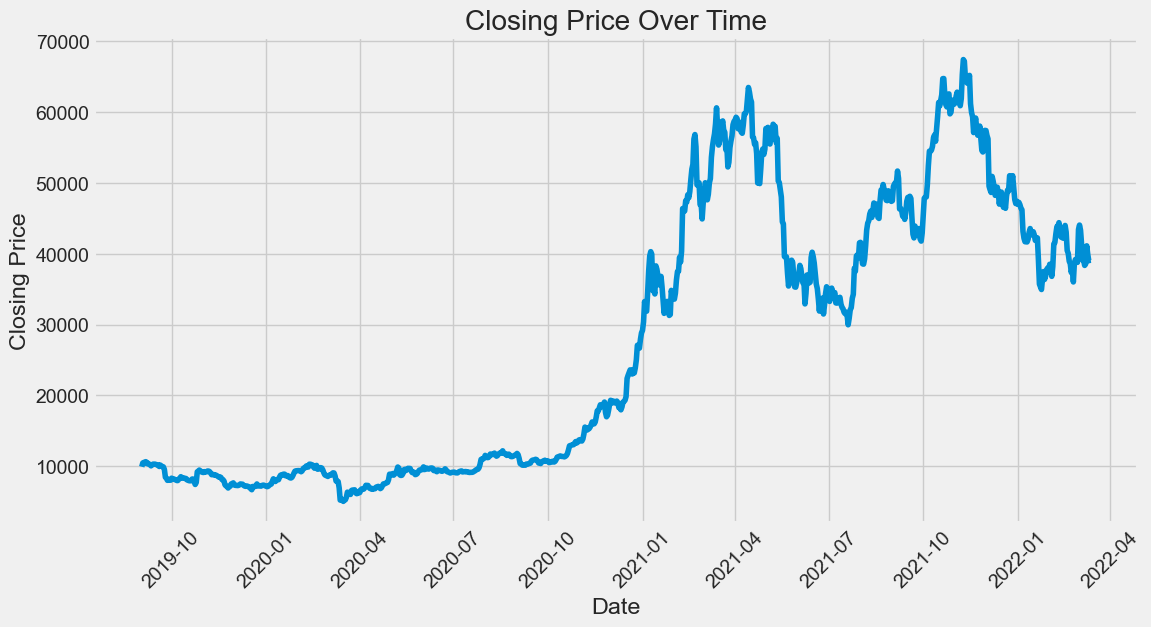

In [17]:
# e. Histogram of closing price over time
print("e. Histogram of closing price over time:")

# Create a line plot of closing price over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=df_day)

# Add title and labels to the plot
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

* Average closing price: 27369.52
* Highest closing price: 67410.25
* Lowest closing price: 5052.57
* There is no outliers in Close column
* From beginning of 2021 closing price has jumped to over 4000$ and continue upraise

### 3) Volume Column

In [18]:
# a. Check for average volume
print("a. Average volume:", df_day['Volume'].mean())

# b. Check for highest volume
print("b. Highest volume:", df_day['Volume'].max())

# c. Check for lowest volume
print("c. Lowest volume:", df_day['Volume'].min())

# d. Check for outliers in the volume
# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = df_day['Volume'].quantile(0.25)
Q3 = df_day['Volume'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers using the lower and upper bounds
outliers = df_day[(df_day['Volume'] < lower_bound) | (df_day['Volume'] > upper_bound)]['Volume']

# Print message about outliers in volume
print("d. Outliers in volume:")
# Check if any outliers are found
if len(outliers) == 0:
    print("   No outliers found.")
else:
    # Print the count of outliers
    print(outliers.count())

a. Average volume: 45.03267889307218
b. Highest volume: 303.8135107652778
c. Lowest volume: 11.465326166666667
d. Outliers in volume:
45


e. Histogram of volume over time:


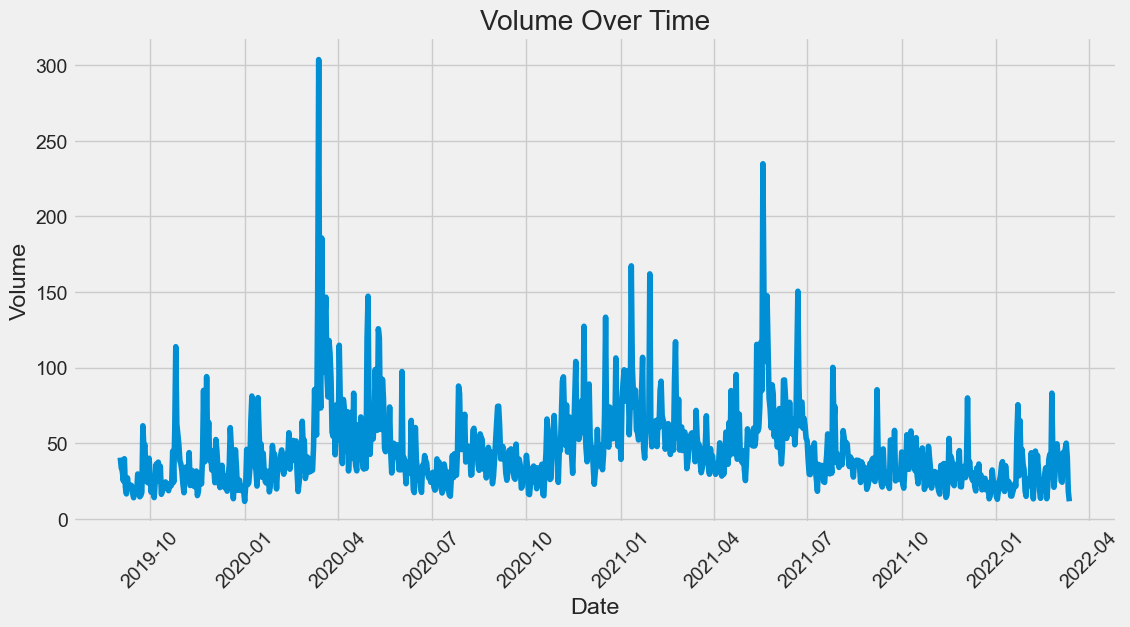

In [19]:
# e. Histogram of volume over time
print("e. Histogram of volume over time:")

# Create a line plot of volume over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Volume', data=df_day)

# Add title and labels to the plot
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

* Average volume: 45.03
* Highest volume: 303.81
* Lowest volume: 11.46
* There is 45 outliers in volume column
* There is a wiggling in the volume but it have seen some high jump in it

## Bivariate Analysis & Visualizations

In [20]:
# 1. Correlation between opening and closing prices
# Calculate the correlation coefficient between opening and closing prices
correlation_open_close = df_day['Open'].corr(df_day['Close'])

# Print the correlation coefficient
print("1. Correlation between opening and closing prices:", correlation_open_close)

1. Correlation between opening and closing prices: 0.9999999988814089


* A robust positive correlation exists between the opening and closing prices, with a correlation coefficient of 0.99.

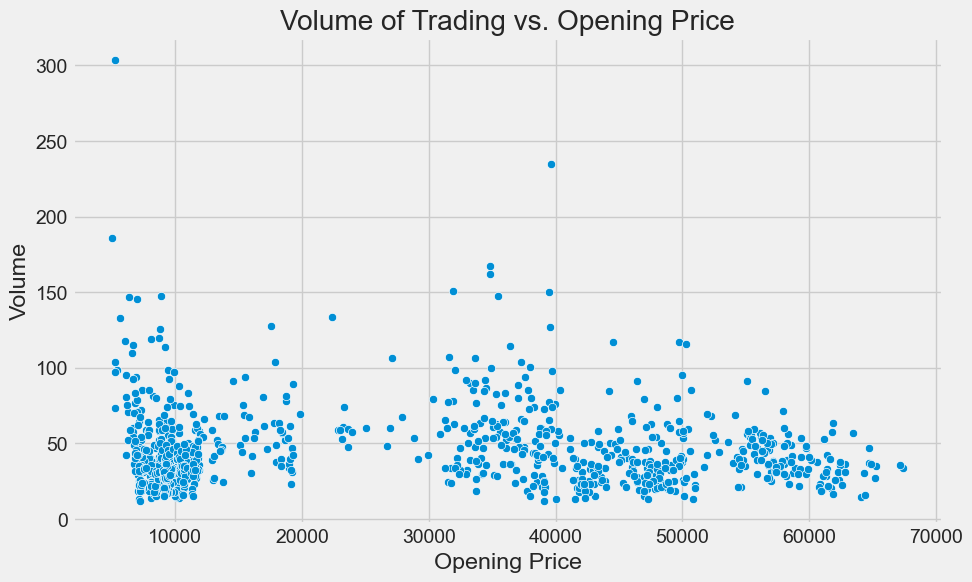

In [6]:
# 2. Volume of trading vs. changes in opening price
# Create a scatter plot to visualize the relationship between volume of trading and opening price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Volume', data=df_day)

# Add title and labels to the plot
plt.title('Volume of Trading vs. Opening Price')
plt.xlabel('Opening Price')
plt.ylabel('Volume')
# Display the plot
plt.show()

* There is a negative correlation observed between trading volume and opening price. Specifically, as the opening price increases, the trading volume tends to decrease.

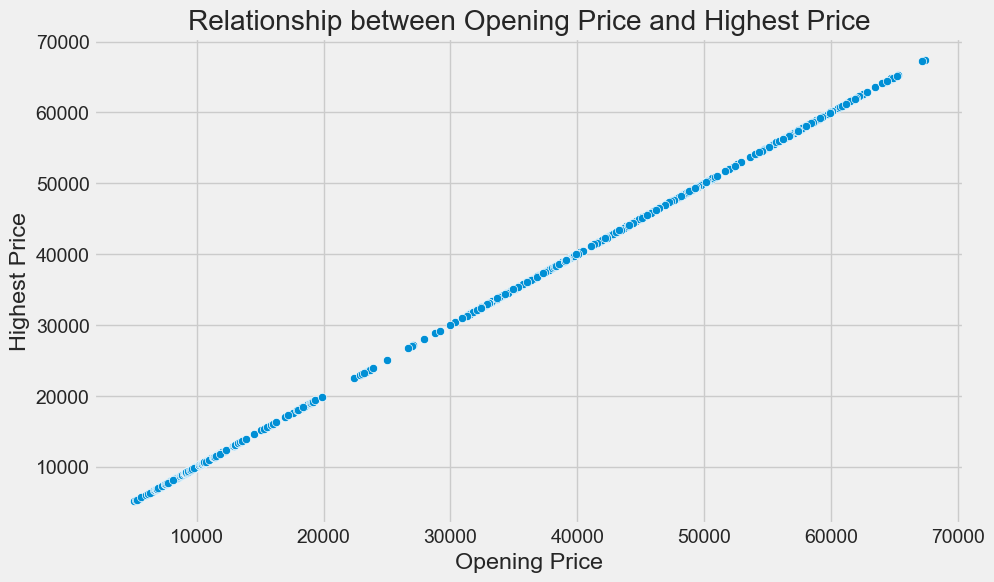

In [7]:
# 3. Relationship between opening price and highest price
# Create a scatter plot to visualize the relationship between opening price and highest price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='High', data=df_day)

# Add title and labels to the plot
plt.title('Relationship between Opening Price and Highest Price')
plt.xlabel('Opening Price')
plt.ylabel('Highest Price')

# Display the plot
plt.show()

* There is a significant positive correlation observed between the opening price and the highest price, suggesting that as the opening price increases, the highest price tends to increase as well.

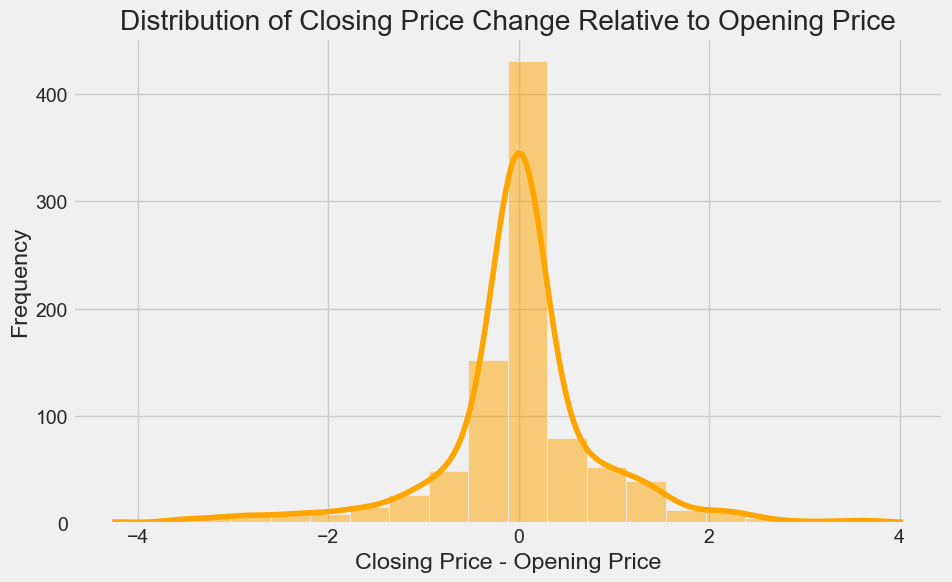

In [8]:
# 4. Closing price change relative to opening price
# Calculate the difference between closing price and opening price
df_day['Close - Open'] = df_day['Close'] - df_day['Open']

# Create a histogram to visualize the distribution of closing price change relative to opening price
plt.figure(figsize=(10, 6))
sns.histplot(df_day['Close - Open'], bins=20, kde=True, color='orange')

# Add title and labels to the plot
plt.title('Distribution of Closing Price Change Relative to Opening Price')
plt.xlabel('Closing Price - Opening Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

* The relationship between the opening and closing prices appears to be symmetric, This symmetry suggests a balanced market behavior between opening and closing prices.

In [24]:
# 5. Correlation between trading volume and closing price
# Calculate the correlation coefficient between trading volume and closing price
correlation_volume_close = df_day['Volume'].corr(df_day['Close'])

# Print the correlation coefficient
print("5. Correlation between trading volume and closing price:", correlation_volume_close)

5. Correlation between trading volume and closing price: -0.030682971996821445


* There is a slight negative correlation observed between the trading volume and the closing price, with a correlation coefficient of approximately -0.03.

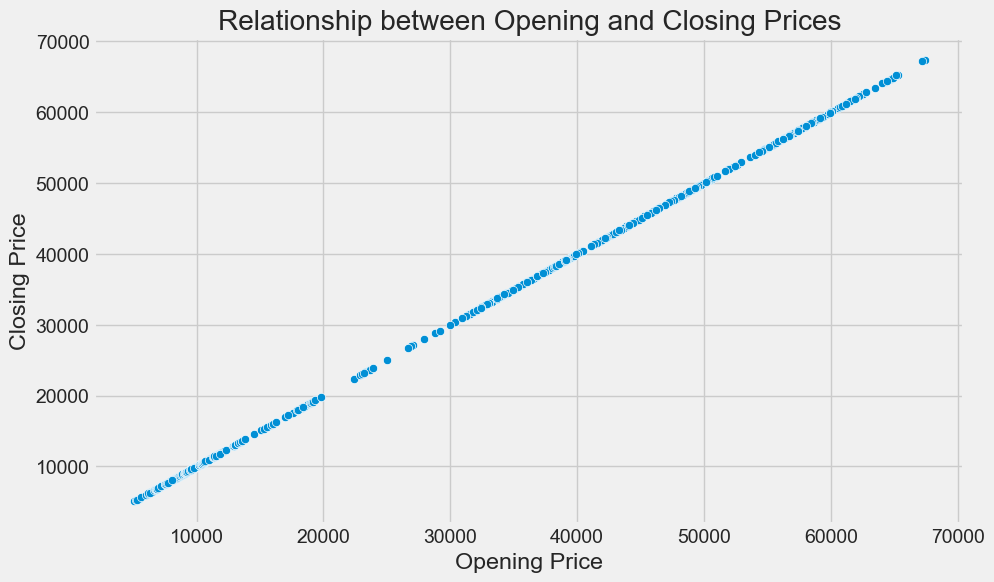

In [25]:
# 6. Relationship between opening and closing prices
# Create a scatter plot to visualize the relationship between opening and closing prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Close', data=df_day)

# Add title and labels to the plot
plt.title('Relationship between Opening and Closing Prices')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')

# Display the plot
plt.show()

* There is a strong positive correlation between the opening and closing prices, This suggests a consistent trend where prices typically close higher than their opening values.

## EDA Conclusions

Here's a refined version of the EDA conclusions:

1. **Opening Price Insights:**
   - The average opening price of Bitcoin during the analyzed period stands at \\$27,369.5, with the highest recorded opening price reaching \\$67,409.38 and the lowest at \\$5,052.64. No outliers were detected in the opening price column.
   - Notably, since the beginning of 2021, there has been a significant surge in the opening price, with an increase of over \\$4,000 and a continued upward trend.

2. **Closing Price Insights:**
   - Similarly, the average closing price of Bitcoin is \\$27,369.52, with the highest recorded closing price at \\$67,410.25 and the lowest at \\$5,052.57. Like the opening price, no outliers were identified in the closing price column.
   - From the onset of 2021, there has been a substantial surge in the closing price, exceeding \\$4,000, and displaying a continuous upward trajectory.

3. **Volume Insights:**
   - The average trading volume during the period is approximately 45.03, with the highest volume recorded at 303.81 and the lowest at 11.46. However, there are 45 outliers detected in the volume column.
   - While there is a noticeable fluctuation in volume, there are instances of significant spikes indicating heightened activity in trading.

4. **Correlation Analysis:**
   - A robust positive correlation of 0.99 exists between the opening and closing prices, suggesting a strong relationship where prices tend to close higher than their opening values.
   - Conversely, a negative correlation is observed between trading volume and opening price, indicating that as the opening price increases, the trading volume tends to decrease.
   - Moreover, a significant positive correlation between the opening price and the highest price is evident, indicating a tendency for both prices to increase together.
   - The relationship between opening and closing prices appears to be symmetric, suggesting a balanced market behavior between these two metrics.
   - Additionally, a slight negative correlation is observed between trading volume and closing price, indicating a subtle trend where higher trading volumes may coincide with lower closing prices.

### Normalizing Data

In [5]:
# Grouping the data by date and calculating the mean closing price for each date
df_close = df.groupby('Date')['Close'].mean()

# Creating a DataFrame from the calculated mean closing prices
df_close = pd.DataFrame(df_close)

In [6]:
# Importing MinMaxScaler from sklearn.preprocessing module
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler object with feature range scaled between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshaping the closing price values into a 2D array and scaling the data
scaled_data = scaler.fit_transform(np.array(df_close.values).reshape(-1, 1))

### Splitting the Data

In [7]:
# Splitting the data into training and testing sets
# 75% of the data for training, 25% for testing
train_size = int(len(df_close) * 0.75)
test_size = len(df_close) - train_size

# Printing the sizes of the training and testing sets
print("Train Size:", train_size, "Test Size:", test_size)

# Extracting the training and testing data from the scaled data
# For training data, select the first 'train_size' elements
train_data = scaled_data[:train_size, 0:1]
# For testing data, select 'test_size' elements starting from 'train_size - 60'
test_data = scaled_data[train_size - 60:, 0:1]

Train Size: 693 Test Size: 231


In [8]:
# Checking the shapes of the training and testing data arrays
# This provides information about the dimensions of the arrays
train_data.shape, test_data.shape

((693, 1), (291, 1))

### Creating training set

In [9]:
# Creating a Training set with 60 time-steps and 1 output
x_train = []  # List to store input sequences
y_train = []  # List to store output values

# Iterating over the training data to create input-output pairs
# Each input sequence contains 60 time-steps, and the corresponding output is the next time-step value
for i in range(60, len(train_data)):
    # Extracting input sequence of length 60 and appending it to x_train
    x_train.append(train_data[i - 60:i, 0])
    # Extracting the output value (next time-step) and appending it to y_train
    y_train.append(train_data[i, 0])

In [10]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
# Reshaping the input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [12]:
# Checking the shapes of the training input and output arrays
# This provides information about the dimensions of the arrays
x_train.shape, y_train.shape

((633, 60, 1), (633,))

# LSTM Model

### Model Structure

In [13]:
# Define the LSTM model architecture
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),  # LSTM layer with 50 units, returns sequences, input shape: (sequence length, features)
    LSTM(64, return_sequences=False),  # LSTM layer with 64 units, does not return sequences
    Dense(32),  # Fully connected (dense) layer with 32 units
    Dense(16),  # Fully connected (dense) layer with 16 units
    Dense(1)    # Output layer with 1 unit (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics="mean_absolute_error")

In [14]:
# Display a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model Training

In [15]:
# Fit the LSTM model to the training set
# Early stopping callback is used to stop training if the loss stops decreasing
callbacks = [EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)]

# Fit the model to the training data
# Number of epochs is set to 100, and batch size is set to 32
history = model.fit(x_train, y_train, epochs=100, batch_size=32, callbacks=callbacks)

Epoch 1/250


20/20 [==============================] - 3s 21ms/step - loss: 0.0322 - mean_absolute_error: 0.1179
Epoch 2/250
20/20 [==============================] - 0s 20ms/step - loss: 0.0026 - mean_absolute_error: 0.0325
Epoch 3/250
20/20 [==============================] - 0s 21ms/step - loss: 0.0019 - mean_absolute_error: 0.0270
Epoch 4/250
20/20 [==============================] - 0s 20ms/step - loss: 0.0020 - mean_absolute_error: 0.0264
Epoch 5/250
20/20 [==============================] - 0s 21ms/step - loss: 0.0018 - mean_absolute_error: 0.0255
Epoch 6/250
20/20 [==============================] - 0s 20ms/step - loss: 0.0016 - mean_absolute_error: 0.0235
Epoch 7/250
20/20 [==============================] - 0s 21ms/step - loss: 0.0019 - mean_absolute_error: 0.0257
Epoch 8/250
20/20 [==============================] - 0s 20ms/step - loss: 0.0015 - mean_absolute_error: 0.0230
Epoch 9/250
20/20 [==============================] - 0s 21ms/step - loss: 0.0013 - mean_absolute_error: 0.0217

20/20 [==============================] - 0s 21ms/step - loss: 3.5282e-04 - mean_absolute_error: 0.0114
Epoch 69/250
20/20 [==============================] - 0s 21ms/step - loss: 3.4248e-04 - mean_absolute_error: 0.0113
Epoch 70/250
20/20 [==============================] - 0s 21ms/step - loss: 3.2598e-04 - mean_absolute_error: 0.0110
Epoch 71/250
20/20 [==============================] - 0s 21ms/step - loss: 3.9358e-04 - mean_absolute_error: 0.0129
Epoch 72/250
20/20 [==============================] - 0s 21ms/step - loss: 3.3284e-04 - mean_absolute_error: 0.0115
Epoch 73/250
20/20 [==============================] - 0s 21ms/step - loss: 5.2426e-04 - mean_absolute_error: 0.0153
Epoch 74/250
20/20 [==============================] - 0s 22ms/step - loss: 3.0902e-04 - mean_absolute_error: 0.0106
Epoch 75/250
20/20 [==============================] - 0s 21ms/step - loss: 3.4520e-04 - mean_absolute_error: 0.0116
Epoch 76/250
20/20 [==============================] - 0s 21ms/step - loss: 3.8754e-04

### Model Evaluation

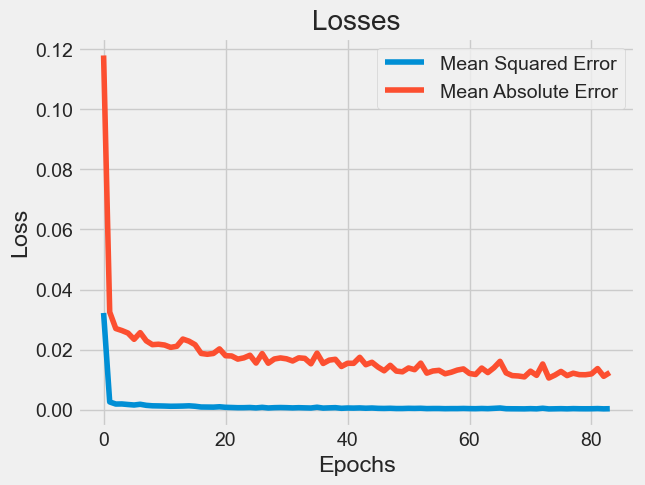

In [16]:
# Plotting the training losses over epochs
plt.plot(history.history["loss"])  # Plot mean squared error loss
plt.plot(history.history["mean_absolute_error"])  # Plot mean absolute error
plt.legend(['Mean Squared Error', 'Mean Absolute Error'])  # Add legend
plt.title("Losses")  # Set title
plt.xlabel("Epochs")  # Set x-axis label
plt.ylabel("Loss")  # Set y-axis label
plt.show()  # Show the plot

# Predection

### Creating testing set

In [20]:
# Creating a testing set with 60 time-steps and 1 output
x_test = []  # Initialize list for input sequences
y_test = []  # Initialize list for output values

# Loop through the test data to create input-output pairs
for i in range(60, len(test_data)):
    # Append the previous 60 time-steps as input
    x_test.append(test_data[i-60:i, 0])
    # Append the next time-step as the output
    y_test.append(test_data[i, 0])

# Convert lists to numpy arrays
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape input data to match the input shape expected by the model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
# Check the shape of the testing data
x_test.shape , y_test.shape

((231, 60, 1), (231,))

In [22]:
# Perform inverse scaling on the predicted values to obtain actual values
predictions = model.predict(x_test)

# Inverse scaling of the predictions to obtain actual values
predictions = scaler.inverse_transform(predictions)

# Check the shape of the predictions
predictions.shape

8/8 [==============================] - 1s 7ms/step


(231, 1)

### Root mean square error

In [23]:
# Inverse scaling on the test output data to obtain actual values
y_test = scaler.inverse_transform([y_test])

# Calculate the Root Mean Squared Error (RMSE) between actual and predicted values
RMSE = np.sqrt(np.mean( (y_test - predictions)**2 )).round(2)

# Print the RMSE value
RMSE

11233.52

### Visualize Predictions with The Data

In [24]:
# Check the shape of the predictions array
predictions.shape

(231, 1)

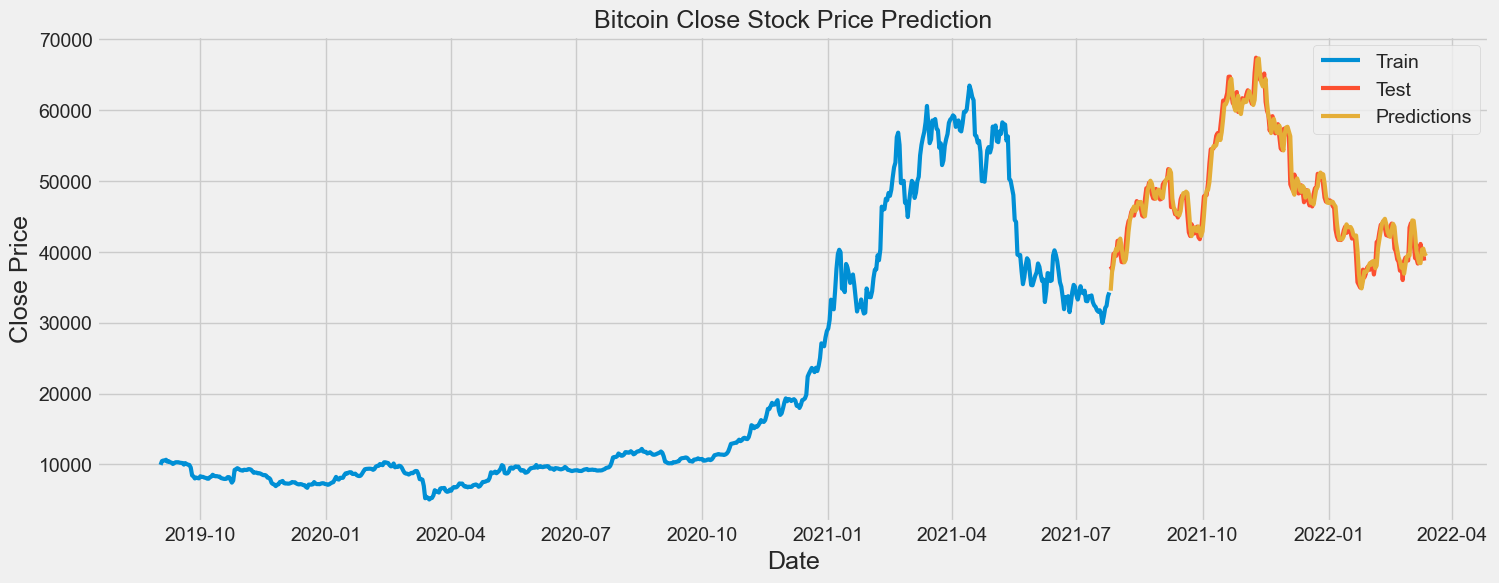

In [25]:
# Plotting the predicted and actual closing prices

# Extracting training and testing data
train = df_close.iloc[:train_size , 0:1]
test = df_close.iloc[train_size: , 0:1]

# Adding predictions to the testing data
test['Predictions'] = predictions

# Setting up the plot
plt.figure(figsize= (16, 6))
plt.title('Bitcoin Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)

# Plotting the training, testing, and predicted closing prices
plt.plot(train['Close'], linewidth= 3)
plt.plot(test['Close'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)

# Adding legend
plt.legend(['Train', 'Test', 'Predictions'])

# Forecast Next 30 Days

In [26]:
# Importing the timedelta class from the datetime module
from datetime import timedelta

In [27]:
def insert_end(Xin, new_input):
    """
    Inserts a new input sequence at the end of the input array.

    Args:
    - Xin: Input array of shape (batch_size, timestep, features).
    - new_input: New input sequence to be inserted, with shape (batch_size, 1, features).

    Returns:
    - Xin: Updated input array with the new input sequence inserted at the end.
    """
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

In [28]:
future = 30
forcast = []  # List to store forecasted values
Xin = x_test[-1 :, :, :]  # Initial input sequence for forecasting
time = []  # List to store future time steps

# Loop to forecast future values
for i in range(0, future):
    out = model.predict(Xin, batch_size=5)  # Predict next value
    forcast.append(out[0, 0])  # Append predicted value to forecast list
    Xin = insert_end(Xin, out[0, 0])  # Update input sequence for the next prediction
    time.append(pd.to_datetime(df_day.index[-1]) + timedelta(days=i))  # Append future time step

1/1 [==============================] - 0s 19ms/step


In [29]:
# Display yhe time steps we make
time

[Timestamp('2022-03-13 00:00:00'),
 Timestamp('2022-03-14 00:00:00'),
 Timestamp('2022-03-15 00:00:00'),
 Timestamp('2022-03-16 00:00:00'),
 Timestamp('2022-03-17 00:00:00'),
 Timestamp('2022-03-18 00:00:00'),
 Timestamp('2022-03-19 00:00:00'),
 Timestamp('2022-03-20 00:00:00'),
 Timestamp('2022-03-21 00:00:00'),
 Timestamp('2022-03-22 00:00:00'),
 Timestamp('2022-03-23 00:00:00'),
 Timestamp('2022-03-24 00:00:00'),
 Timestamp('2022-03-25 00:00:00'),
 Timestamp('2022-03-26 00:00:00'),
 Timestamp('2022-03-27 00:00:00'),
 Timestamp('2022-03-28 00:00:00'),
 Timestamp('2022-03-29 00:00:00'),
 Timestamp('2022-03-30 00:00:00'),
 Timestamp('2022-03-31 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-04-02 00:00:00'),
 Timestamp('2022-04-03 00:00:00'),
 Timestamp('2022-04-04 00:00:00'),
 Timestamp('2022-04-05 00:00:00'),
 Timestamp('2022-04-06 00:00:00'),
 Timestamp('2022-04-07 00:00:00'),
 Timestamp('2022-04-08 00:00:00'),
 Timestamp('2022-04-09 00:00:00'),
 Timestamp('2022-04-

### Create forecasted dataframe

In [30]:
# Convert the forecasted output to a numpy array
forcasted_output = np.asanyarray(forcast)   

# Reshape the forecasted output array to match the original data shape
forcasted_output = forcasted_output.reshape(-1, 1) 

# Inverse transform to scale back to the original data range
forcasted_output = scaler.inverse_transform(forcasted_output) 

In [31]:
# Create a DataFrame for the forecasted output
forcasted_output = pd.DataFrame(forcasted_output)

# Create a DataFrame for the corresponding dates
date = pd.DataFrame(time)

# Concatenate the date and forecasted output DataFrames along the columns axis
df_result = pd.concat([date, forcasted_output], axis=1)

# Rename the columns of the resulting DataFrame
df_result.columns = ["Date", "Forecasted"]

## Forecasted tesla close price

In [32]:
# Display df_result
df_result

,Date,Forecasted
0,2022-03-13,39419.863281
1,2022-03-14,39569.816406
2,2022-03-15,39786.734375
3,2022-03-16,40033.710938
4,2022-03-17,40301.023438
5,2022-03-18,40580.535156
6,2022-03-19,40865.347656
7,2022-03-20,41149.941406
8,2022-03-21,41430.089844
9,2022-03-22,41702.757812


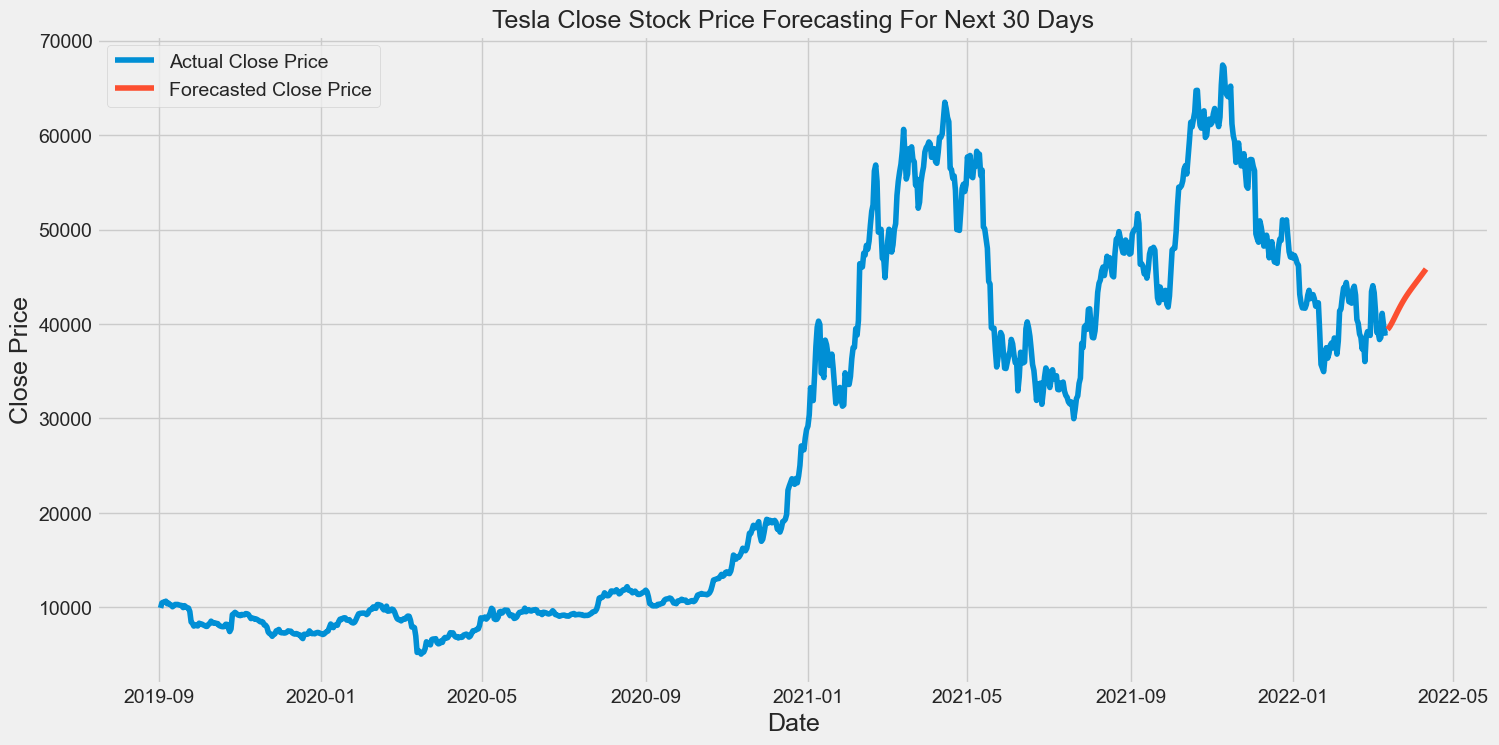

In [33]:
# Plot the forecasted values along with the actual closing prices
plt.figure(figsize=(16, 8))  # Set the figure size for better visualization
plt.title('Tesla Close Stock Price Forecasting For Next 30 Days', fontsize=18)  # Set the title of the plot
plt.xlabel('Date', fontsize=18)  # Set the label for the x-axis
plt.ylabel('Close Price', fontsize=18)  # Set the label for the y-axis
plt.plot(df_day['Close'], label='Actual Close Price')  # Plot the actual closing prices
plt.plot(df_result.set_index('Date')['Forecasted'], label='Forecasted Close Price')  # Plot the forecasted closing prices
plt.legend()  # Show the legend for better interpretation
plt.show()  # Display the plot

## Thank You..!
### If you found this notebook good enough, please upvote it..!